## Table of Contents:
### 01. Importing Libraries and Data
### 02. Data Cleaning 
### 03. Exploring Relationships 
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
### 04. Additional Charts
     Distribution of Profiles
### 05. Questions Answered
### 06. Additional Questions and Hypotheses

## 01. Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
#checking to see what version of matplotlib I have
matplotlib.__version__

'3.8.4'

In [5]:
# Ensuring the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [6]:
#creating path
path = r'C:\Users\canam\Achievement 6\Citibike Analysis'

In [7]:
#importing data 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_cleaned.csv'), index_col = False)

In [8]:
df.shape

(50000, 17)

## 02. Data Cleaning

In [10]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'subscriber', 'gender', 'age', 'trip_duration_mins'],
      dtype='object')

In [11]:
df.head()

,Unnamed: 0,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber,gender,age,trip_duration_mins
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,2,45.000000,16.550000
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1,30.000000,9.683333
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1,24.000000,6.016667
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,2,25.000000,9.350000
4,4,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,Non-Subscriber,0,37.372214,38.266667


In [12]:
#dropping unnamed column
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [13]:
#checking to see if unnamed column was dropped
df.head()

,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber,gender,age,trip_duration_mins
0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,2,45.000000,16.550000
1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1,30.000000,9.683333
2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1,24.000000,6.016667
3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,2,25.000000,9.350000
4,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,Non-Subscriber,0,37.372214,38.266667


In [14]:
#checking data types
df.dtypes

day_of_week                 object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
subscriber                  object
gender                       int64
age                        float64
trip_duration_mins         float64
dtype: object

In [15]:
#need to make the following changes
#start_time to datetime format
#start_station_id to string 
#end_time to datetime format
#end_station_id to string 
#gender into string 

In [16]:
#converting start_time into datetime 
df['start_time'] = pd.to_datetime(df['start_time'])

In [17]:
#converting start_station_id into string
df['start_station_id'] = df['start_station_id'].astype('str')

In [18]:
#converting end_time to datetime
df['end_time'] = pd.to_datetime(df['end_time'])

In [19]:
#converting end_station_id into string
df['end_station_id'] = df['end_station_id'].astype('str')

In [20]:
#converting gender into string
df['gender'] = df['gender'].astype('str')

In [21]:
#checking to see if data types have changed
df.dtypes

day_of_week                        object
start_hour                          int64
start_time                 datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_time                   datetime64[ns]
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
subscriber                         object
gender                             object
age                               float64
trip_duration_mins                float64
dtype: object

In [22]:
#renaming subscriber to subscriber_status
df.rename(columns = {'subscriber' : 'subscriber_status'}, inplace = True)

In [23]:
#checking to see if subscriber has become subscriber status
df.columns

Index(['day_of_week', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'subscriber_status', 'gender', 'age', 'trip_duration_mins'],
      dtype='object')

### Missing Values Check

In [25]:
#checking for missing values 
df.isnull().sum()

day_of_week                0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
subscriber_status          0
gender                     0
age                        0
trip_duration_mins         0
dtype: int64

In [26]:
#no missing values 

### Duplicates check

In [28]:
#checking to see if there are any duplicate
df_dups = df[df.duplicated()]

In [29]:
df_dups

,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber_status,gender,age,trip_duration_mins


In [30]:
#there are no duplicates 

### Mixed-Type Data check

In [32]:
##checking for mixed-type data
for col in df.columns.tolist():
  weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [33]:
#there are no mixed-type columns

## 03. Exploring Relationships

### Correlations

In [36]:
#creating correlation matrix
df.corr()

ValueError: could not convert string to float: 'Mon'

In [39]:
#creating a subset of data that can be analyzed in using correlation 
df.columns

Index(['day_of_week', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'subscriber_status', 'gender', 'age', 'trip_duration_mins'],
      dtype='object')

In [41]:
df_sub = df[['start_hour', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude','end_station_longitude', 'age', 'trip_duration_mins']]

In [43]:
df_sub

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,age,trip_duration_mins
0,18,40.754666,-73.991382,40.742388,-73.997262,45.000000,16.550000
1,18,40.719392,-74.002472,40.728419,-73.987140,30.000000,9.683333
2,19,40.760193,-73.991255,40.768254,-73.988639,24.000000,6.016667
3,11,40.743156,-73.974347,40.756014,-73.967416,25.000000,9.350000
4,18,40.750450,-73.994811,40.743943,-73.979661,37.372214,38.266667
...,...,...,...,...,...,...,...
49995,18,40.760193,-73.991255,40.760301,-73.998842,37.372214,44.950000
49996,17,40.694749,-73.983625,40.721816,-73.997203,43.000000,19.850000
49997,18,40.740343,-73.989551,40.755273,-73.983169,52.000000,17.500000
49998,13,40.685282,-73.978058,40.693317,-73.953820,37.372214,44.950000


In [45]:
df_sub.corr()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,age,trip_duration_mins
start_hour,1.000000,-0.009121,-0.045734,-0.036941,0.007160,-0.060029,0.040870
start_station_latitude,-0.009121,1.000000,0.211969,0.585463,0.078218,0.042379,-0.025321
start_station_longitude,-0.045734,0.211969,1.000000,0.093074,0.418376,-0.026062,-0.007220
end_station_latitude,-0.036941,0.585463,0.093074,1.000000,0.200080,0.039351,-0.044033
end_station_longitude,0.007160,0.078218,0.418376,0.200080,1.000000,-0.035880,0.001111
age,-0.060029,0.042379,-0.026062,0.039351,-0.035880,1.000000,0.039035
trip_duration_mins,0.040870,-0.025321,-0.007220,-0.044033,0.001111,0.039035,1.000000


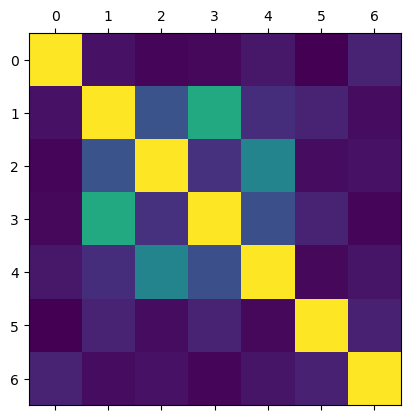

In [47]:
# Creating a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

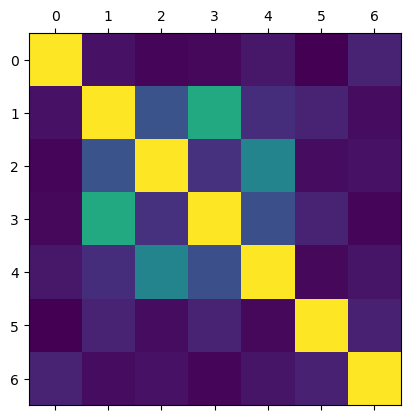

In [49]:
#saving figure
plt.matshow(df_sub.corr())
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlation_heatmap.png'))

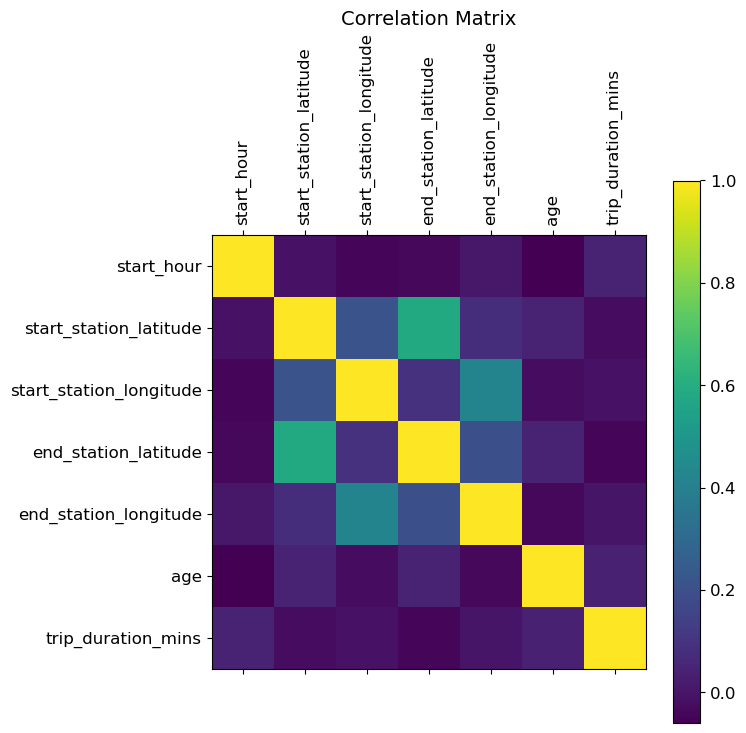

In [51]:
#changing figure size, adding x and y axis labels, 
f = plt.figure(figsize=(7, 7)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # adding a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # adding font size
plt.title('Correlation Matrix', fontsize=14) # adding title
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlation_matrix_heatmap.png'),bbox_inches = 'tight') #saving figure 

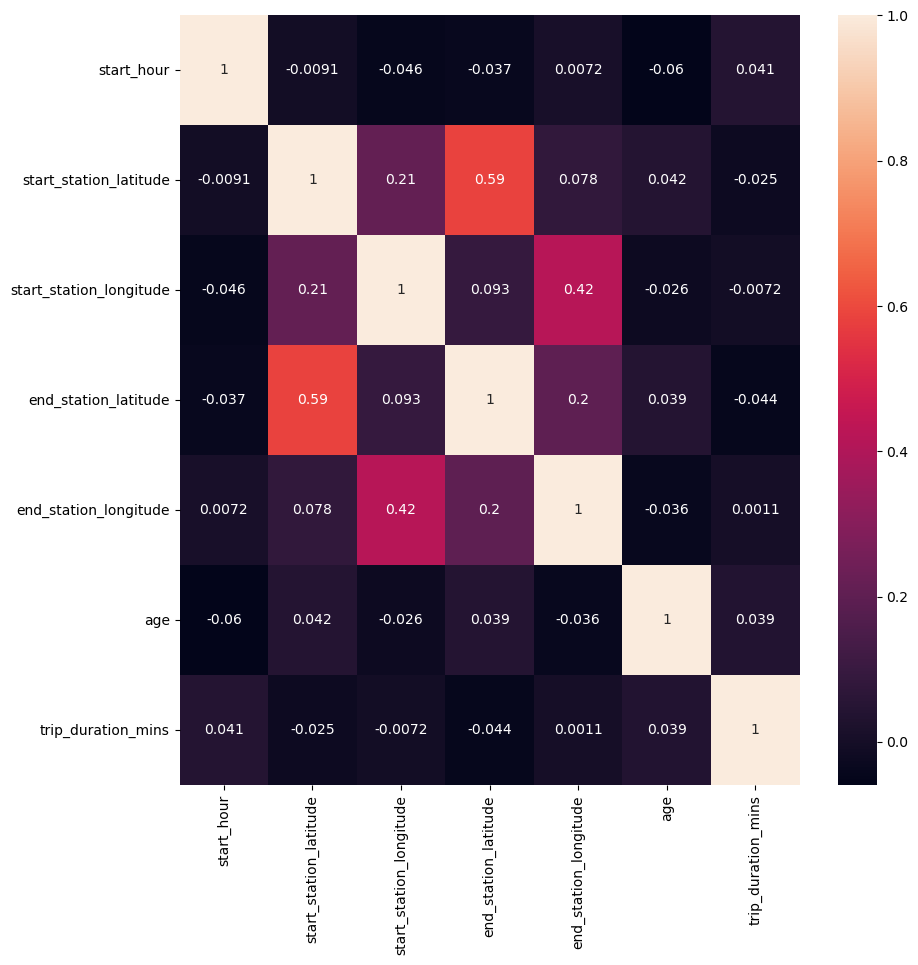

In [53]:
## Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # using `annot` argument to allow the plot to place the 
#correlation coefficients onto the heatmap.

#saving correlations heatmap
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlation_heat_map_with_coefficients.png'),bbox_inches = 'tight')

Coefficient Guidelines: 

- 0: no relationship
- 0.1–0.3: weak relationship
- 0.3–0.5: moderate relationship
- 0.5–1.0: strong relationship

Age and trip_duration:
Correlation coefficient is 0.039.  This indicates there is no relationship.

Start_hour and trip_duration:
Correlation coefficient is 0.041.  This indicates there is no relationship. 

Start_hour and age: 
Correlation coefficient is 0.06.  This indicates there is no relationship. 

### Scatterplots

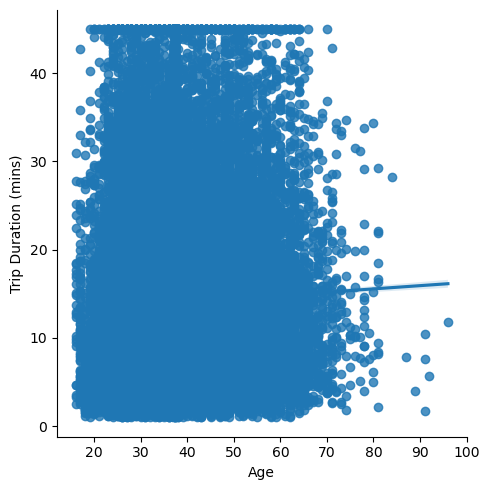

In [57]:
# Creating a scatterplot for the "age" and "trip_duration_mins" columns in seaborn

sns.lmplot(x = 'age', y = 'trip_duration_mins', data = df_sub)
plt.xlabel('Age')
plt.ylabel('Trip Duration (mins)')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_trip_duratin_mins_scatterplot.png'))

Age does not same to have an effect on trip duration.  

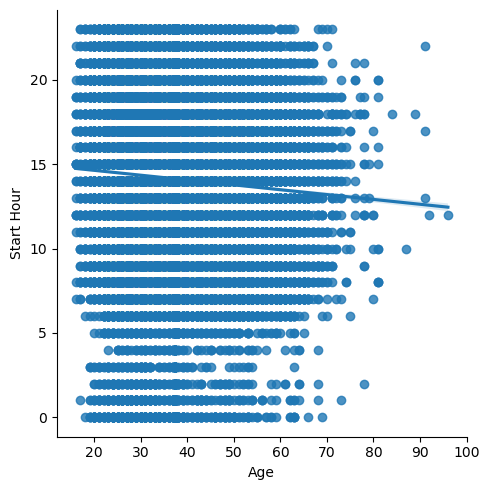

In [60]:
#Creating a scatterplot for the "age" and "start_hour" columns
sns.lmplot(x = 'age', y = 'start_hour', data = df_sub)
plt.xlabel('Age')
plt.ylabel('Start Hour')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_start_hour_scatterplot.png'))

Age does not seem to have an effect on start hour.  

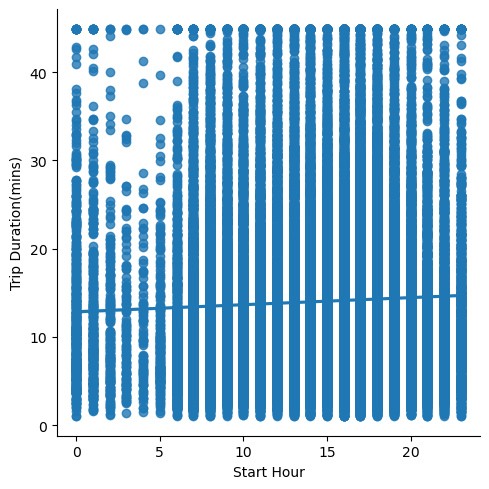

In [63]:
#Creating a scatterplot for the "start_hour" and "trip_duration" columns

sns.lmplot(x = 'start_hour', y = 'trip_duration_mins', data = df_sub)
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration(mins)')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'start_hour_trip_duration_mins_scatterplot.png'))

Trip duration tends to decrease at 11pm, reaching its shortest at 3 am.  After this, trip duration begins to increase again.

### Pair Plot

In [67]:
# Keeping only the variables I want to use in the pair plot

df_sub_2 = df_sub[['age', 'trip_duration_mins', 'start_hour']]

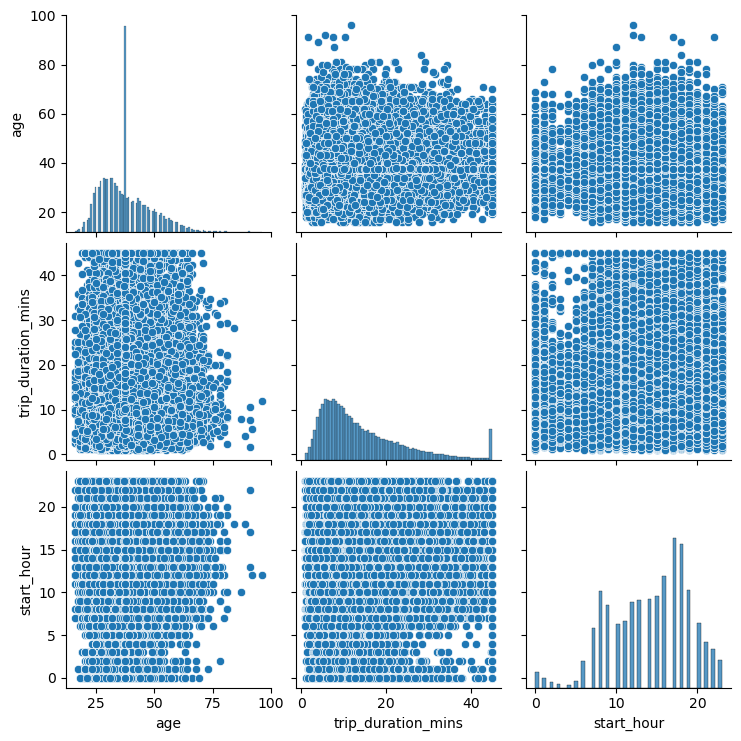

In [69]:
# Creating a pair plot 
g = sns.pairplot(df_sub_2)

No new insights gained from pair plot.  I would like to take a closer look at trip_duration because it seems to have the most variance.  

### Categorical Plot

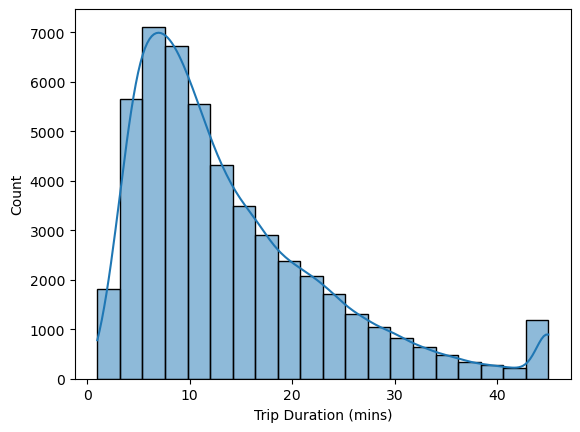

In [73]:
#creating histogram to visualize the distribution of the variable
sns.histplot(df['trip_duration_mins'], bins = 20, kde = True)
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'trip_duration_histogram.png'))

In [75]:
#creating a length_category variable
df.loc[df['trip_duration_mins'] < 15, 'length_category'] = 'Short Ride'

In [77]:
df.loc[(df['trip_duration_mins'] >= 15) & (df['trip_duration_mins'] < 30), 'length_category'] = 'Middle Ride'

In [79]:
df.loc[df['trip_duration_mins'] >= 30, 'length_category'] = 'Long Ride'

In [81]:
#checking the frequency of values 
df['length_category'].value_counts(dropna = False)

length_category
Short Ride     32473
Middle Ride    13767
Long Ride       3760
Name: count, dtype: int64

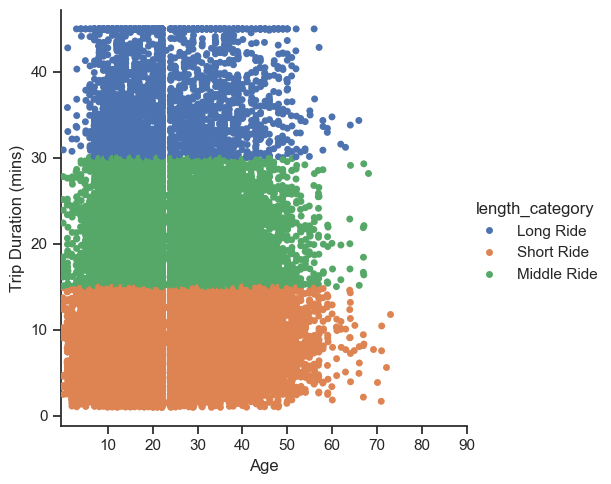

In [83]:
# Creating a categorical plot in seaborn using the length categories created above

sns.set(style="ticks")
g = sns.catplot(x="age", y="trip_duration_mins", hue="length_category", data=df)
plt.xlabel('Age')
plt.xticks([10, 20, 30, 40 , 50, 60, 70, 80, 90], labels=('10', '20', '30', '40', '50', '60', '70', '80', '90'))
plt.ylabel('Trip Duration (mins)')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'trip_duration_catplot.png'))

Age does not seem to have an effect on length category.  

## 04. Additional Graphs 

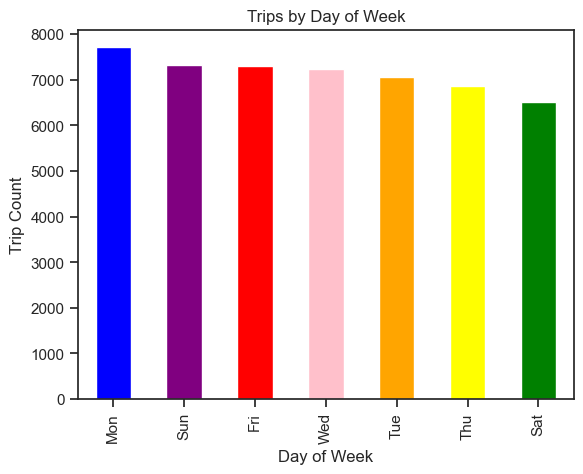

In [87]:
#creating a trips by day of the week graph 
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
trips_by_day_of_week = df['day_of_week'].value_counts().plot.bar(color=['blue', 'purple', 'red', 'pink', 'orange', 'yellow', 'green'])
plt.title('Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'trips_by_day_of_week_bar_graph.png'))

The busiest day is Monday.  The least busiest day is Saturday. However, the number of rides taken does not vary too greatly from day to day.

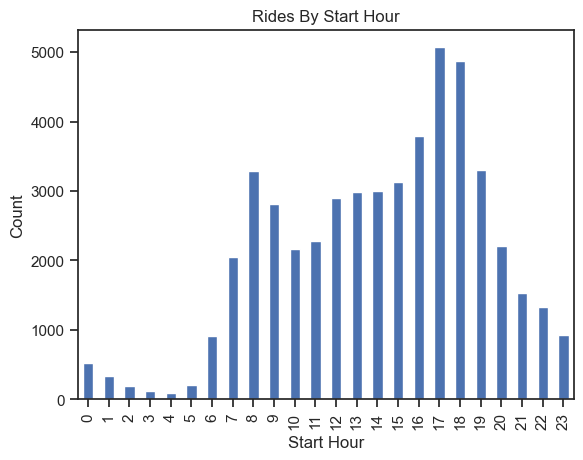

In [90]:
#creating a rides by start_hour of the day chart
rides_by_start_hour = df['start_hour'].value_counts().sort_index().plot.bar()
plt.title('Rides By Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'rides_by_start_hour_bar.png'))

The busiest hours are from 7 am to 8 pm, peaking at 5 pm.  The slowest hours are from 11pm to 6am, reaching their lowest at 4 am.  

In [93]:
#creating profiling variable based on age
#creating an 'Adult' age group
df.loc[df['age'] < 40, 'age_group'] = 'Adult'

In [95]:
#creating a 'Middle Adult' age group
df.loc[(df['age'] >= 40) & (df['age'] <65), 'age_group'] = 'Middle Adult'

In [97]:
#creating a 'Senior Adult' age group 
df.loc[df['age'] >= 65, 'age_group'] = 'Senior Adult'

In [99]:
#checking to see if age group has been added
df.head()

,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber_status,gender,age,trip_duration_mins,length_category,age_group
0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,2,45.000000,16.550000,Middle Ride,Middle Adult
1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1,30.000000,9.683333,Short Ride,Adult
2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1,24.000000,6.016667,Short Ride,Adult
3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,2,25.000000,9.350000,Short Ride,Adult
4,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,Non-Subscriber,0,37.372214,38.266667,Long Ride,Adult


In [101]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citibike_cleaned_with_trip_category_and_age_group.csv'))

### Distribution of Profiles

In [ ]:
#creating a table for age_group distribution
age_group_distribution = df['age_group'].value_counts()

In [ ]:
age_group_distribution

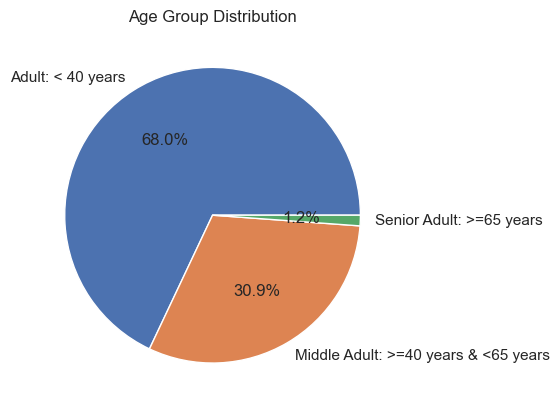

In [164]:
#creating a pie chart
labels = ['Adult: < 40 years', 'Middle Adult: >=40 years & <65 years', 'Senior Adult: >=65 years']
age_group_distribution_pie = plt.pie(age_group_distribution, 
                            labels = labels,
                            autopct='%.1f%%')
plt.title('Age Group Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_distribution_pie.png'), bbox_inches = 'tight') #saving pie chart

The majority of Citibikers are under the age of 40.  

In [166]:
#creating a table for gender distribution
gender_distribution = df['gender'].value_counts()

In [167]:
gender_distribution

gender
1    32361
2    10658
0     6981
Name: count, dtype: int64

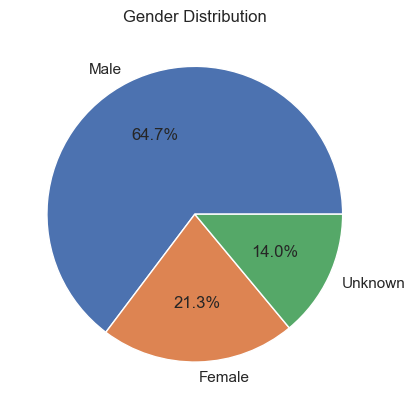

In [168]:
#creating a pie chart
#1 = male, 2 = female, 0 = unknown 
labels = ['Male', 'Female', 'Unknown'] 
gender_distribution_pie = plt.pie(gender_distribution, 
                            labels = labels,
                            autopct='%.1f%%')
plt.title('Gender Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_distribution_pie.png'), bbox_inches = 'tight') #saving pie chart

The majority of Citibikers are male.  There are over 3 times more male Citibikers than female Citibikers.

In [170]:
#creating a table for subscriber status distribution
subscriber_status_distribution = df['subscriber_status'].value_counts()

In [171]:
subscriber_status_distribution

subscriber_status
Subscriber        43021
Non-Subscriber     6979
Name: count, dtype: int64

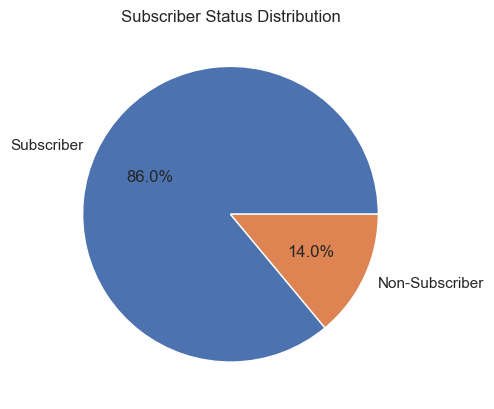

In [172]:
#creating a pie chart
subscriber_distribution_pie = plt.pie(subscriber_status_distribution, 
                            labels = subscriber_status_distribution.index,
                            autopct='%.1f%%')
plt.title('Subscriber Status Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'subscriber_status_distribution_pie.png'), bbox_inches = 'tight') #saving pie chart

The majority of Citibikers are subscribers.  There are more than 6 times more subscribers than non-subscribers.

In [174]:
#creating a trip duration by gender crosstab
trip_duration_by_gender_crosstab =  pd.crosstab(df['length_category'], df['gender'], dropna = False)

In [175]:
trip_duration_by_gender_crosstab

gender,0,1,2
length_category,,,
Long Ride,1321,1638,801
Middle Ride,3266,7330,3171
Short Ride,2394,23393,6686


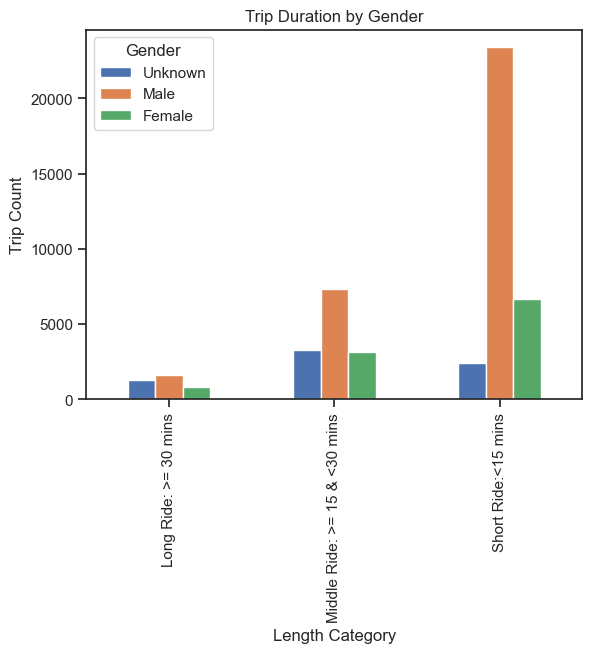

In [176]:
#creating a trip duration by gender bar graph
trip_duration_by_gender = trip_duration_by_gender_crosstab.plot.bar()
plt.title('Trip Duration by Gender')
plt.xlabel('Length Category')
plt.xticks(np.arange(3), ['Long Ride: >= 30 mins', 'Middle Ride: >= 15 & <30 mins', 'Short Ride:<15 mins'])
plt.ylabel('Trip Count')
labels = ['Unknown','Male', 'Female'] 
plt.legend(title='Gender', labels=labels )
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'trip_duration_by_gender_bar.png'), bbox_inches = 'tight') #saving chart

Males take significantly more short and middle-length rides than females. The number of long rides taken is more evenly distributed among the genders. 

In [344]:
#creating a gender by day_of_week crosstab
gender_by_day_of_week_crosstab =  pd.crosstab(df['day_of_week'], df['gender'], dropna = False)

In [346]:
gender_by_day_of_week_crosstab

gender,0,1,2
day_of_week,,,
Fri,713,5069,1527
Mon,916,5136,1663
Sat,1541,3573,1393
Sun,1809,3886,1624
Thu,635,4806,1416
Tue,632,4951,1482
Wed,735,4940,1553


In [348]:
#putting days of week in order in gender_by_day_of_week_crosstab
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] #defining the correct order for the days of the week
gender_by_day_of_week_crosstab = gender_by_day_of_week_crosstab.reset_index() #resetting the index of the crosstab to make 'day_of_week' a column
gender_by_day_of_week_crosstab['day_of_week'] = pd.Categorical(gender_by_day_of_week_crosstab['day_of_week'], categories=day_order, ordered=True) #setting 'day_of_week' as a categorical type with the correct order
gender_by_day_of_week_crosstab_sorted = gender_by_day_of_week_crosstab.sort_values('day_of_week') #sorting the DataFrame by 'day_of_week'
gender_by_day_of_week_crosstab_sorted = gender_by_day_of_week_crosstab_sorted.set_index('day_of_week') #setting the 'day_of_week' back as the index
print(gender_by_day_of_week_crosstab_sorted) #printing the sorted crosstab

gender          0     1     2
day_of_week                  
Mon           916  5136  1663
Tue           632  4951  1482
Wed           735  4940  1553
Thu           635  4806  1416
Fri           713  5069  1527
Sat          1541  3573  1393
Sun          1809  3886  1624


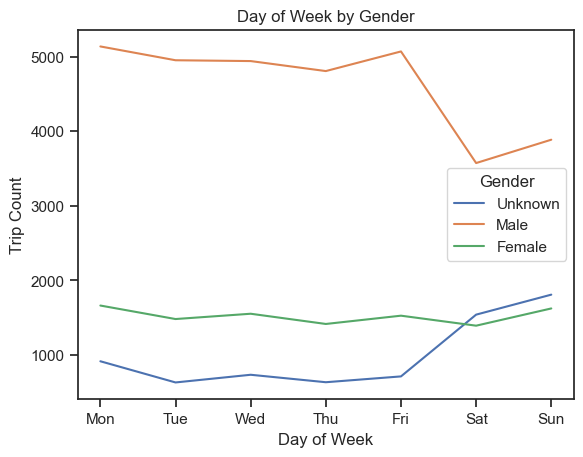

In [353]:
#creating a gender_by_day_of_week chart
gender_by_day_of_week = gender_by_day_of_week_crosstab_sorted.plot.line()
plt.title('Day of Week by Gender')
plt.xlabel('Day of Week', )
plt.ylabel('Trip Count')
labels = ['Unknown','Male', 'Female'] 
plt.legend(title='Gender', labels = labels)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_by_day_of_week.png'), bbox_inches = 'tight') #saving chart

Males more or less take the same amount of rides from Monday to Thursday.  The number of rides increases slightly on Friday and then decreases substantially on Saturdays before increasing again. 
Females more or less take the same amount of rides regardless of what day it is.

In [182]:
#creating a trip duration by subscriber status crosstab
trip_duration_by_subscriber_status_crosstab =  pd.crosstab(df['length_category'], df['subscriber_status'], dropna = False)

In [183]:
trip_duration_by_subscriber_status_crosstab

subscriber_status,Non-Subscriber,Subscriber
length_category,,
Long Ride,1321,2439
Middle Ride,3265,10502
Short Ride,2393,30080


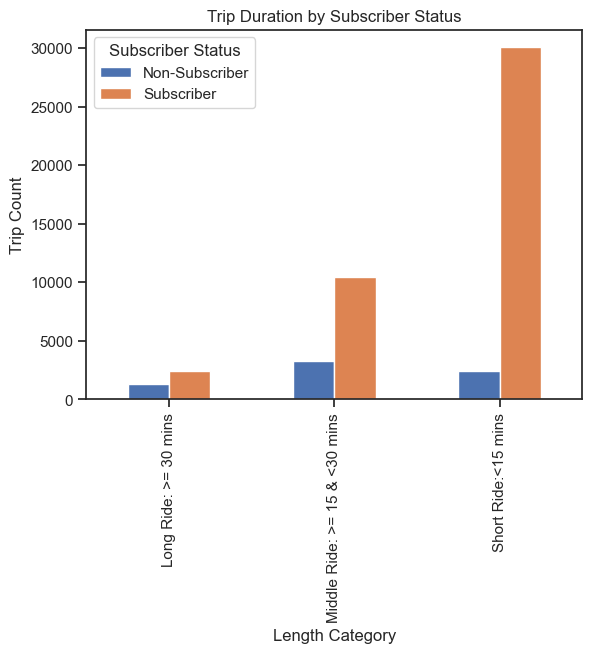

In [184]:
#creating a trip_duration by subscriber status chart
trip_duration_by_subscriber_status = trip_duration_by_subscriber_status_crosstab.plot.bar()
plt.title('Trip Duration by Subscriber Status')
plt.xlabel('Length Category')
plt.xticks(np.arange(3), ['Long Ride: >= 30 mins', 'Middle Ride: >= 15 & <30 mins', 'Short Ride:<15 mins'])
plt.ylabel('Trip Count')
plt.legend(title='Subscriber Status')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'trip_duration_by_subscriber_status.png'), bbox_inches = 'tight') #saving chart

Signficantly more subscribers take middle and short rides than non-subscribers.  Long rides are more evenly distributed among subscriber status. 

In [186]:
#creating a trip duration by age_group crosstab
trip_duration_by_age_group_crosstab =  pd.crosstab(df['length_category'], df['age_group'], dropna = False)

In [187]:
trip_duration_by_age_group_crosstab

age_group,Adult,Middle Adult,Senior Adult
length_category,,,
Long Ride,2755,967,38
Middle Ride,9761,3851,155
Short Ride,21475,10615,383


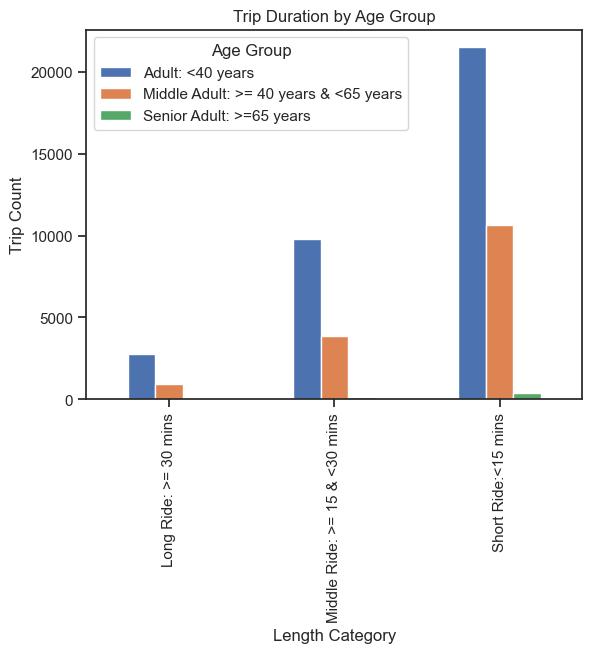

In [188]:
#creating a trip_duration by age group chart
trip_duration_by_age_group = trip_duration_by_age_group_crosstab.plot.bar()
plt.title('Trip Duration by Age Group')
plt.xlabel('Length Category')
plt.xticks(np.arange(3), ['Long Ride: >= 30 mins', 'Middle Ride: >= 15 & <30 mins', 'Short Ride:<15 mins'])
plt.ylabel('Trip Count')
labels = ['Adult: <40 years','Middle Adult: >= 40 years & <65 years', 'Senior Adult: >=65 years']
plt.legend(title='Age Group', labels = labels )
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'trip_duration_by_age_group.png'), bbox_inches = 'tight') #saving chart

Adults ride the most regardless of length category.  Senior adults mostly only take short rides. 

In [319]:
#creating a trip_duration and day of week crosstab
trip_duration_by_day_of_week_crosstab =  pd.crosstab(df['day_of_week'], df['length_category'], dropna = False)

In [321]:
trip_duration_by_day_of_week_crosstab

length_category,Long Ride,Middle Ride,Short Ride
day_of_week,,,
Fri,456,1952,4901
Mon,542,2025,5148
Sat,706,1996,3805
Sun,755,2375,4189
Thu,391,1746,4720
Tue,430,1815,4820
Wed,480,1858,4890


In [323]:
#putting days of week in order in trip_duration_by_day_of_week
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] #defining the correct order for the days of the week
trip_duration_by_day_of_week_crosstab = trip_duration_by_day_of_week_crosstab.reset_index() #resetting the index of the crosstab to make 'day_of_week' a column
trip_duration_by_day_of_week_crosstab['day_of_week'] = pd.Categorical(trip_duration_by_day_of_week_crosstab['day_of_week'], categories=day_order, ordered=True) #setting 'day_of_week' as a categorical type with the correct order
trip_duration_by_day_of_week_crosstab_sorted = trip_duration_by_day_of_week_crosstab.sort_values('day_of_week') #sorting the DataFrame by 'day_of_week'
trip_duration_by_day_of_week_crosstab_sorted = trip_duration_by_day_of_week_crosstab_sorted.set_index('day_of_week') #setting the 'day_of_week' back as the index
print(trip_duration_by_day_of_week_crosstab_sorted) #printing the sorted crosstab

length_category  Long Ride  Middle Ride  Short Ride
day_of_week                                        
Mon                    542         2025        5148
Tue                    430         1815        4820
Wed                    480         1858        4890
Thu                    391         1746        4720
Fri                    456         1952        4901
Sat                    706         1996        3805
Sun                    755         2375        4189


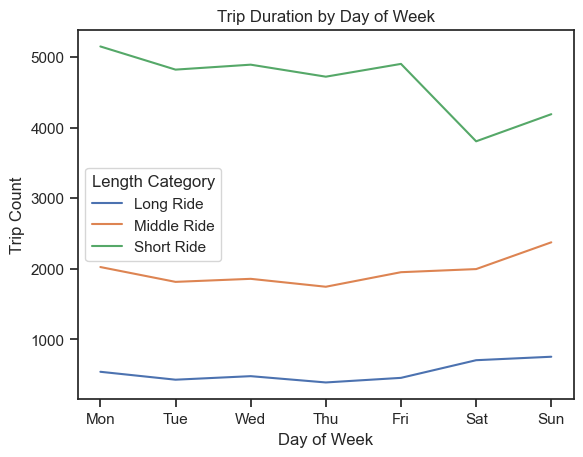

In [327]:
#creating a trip_duration by day_of_week chart
trip_duration_by_day_of_week = trip_duration_by_day_of_week_crosstab_sorted.plot.line()
plt.title('Trip Duration by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.legend(title='Length Category')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'trip_duration_by_day_of_week.png'), bbox_inches = 'tight') #saving chart

The most short rides (<15 mins) are taken on Mondays and the least on Saturdays.
The number of middle rides (>=15 mins & <30 mins) stays fairly constant from Monday to Saturday, then increases on Sunday.
The number of long rides (>= 30 mins) stays fairly constant from Monday to Friday, then increases on Saturdays and Sundays. 

In [194]:
#creating a subscription by gender crosstab
subscriber_status_gender_crosstab =  pd.crosstab(df['gender'], df['subscriber_status'], dropna = False)

In [195]:
subscriber_status_gender_crosstab

subscriber_status,Non-Subscriber,Subscriber
gender,,
0,6979,2
1,0,32361
2,0,10658


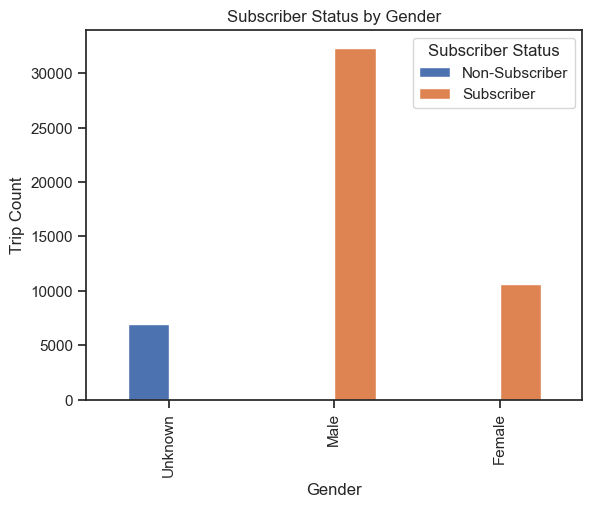

In [196]:
#creating a subscriber status by gender chart
subscriber_status_by_gender = subscriber_status_gender_crosstab.plot.bar()
plt.title('Subscriber Status by Gender')
plt.xlabel('Gender')
plt.xticks(np.arange(3), ['Unknown', 'Male', 'Female'])
plt.ylabel('Trip Count')
plt.legend(title='Subscriber Status')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'subscriber_status_by_gender.png'), bbox_inches = 'tight') #saving chart

Unknowns are almost all non-subscribers.
All the males and females are subscribers.

In [198]:
#creating a subscriber_status by age_group crosstab
subscriber_status_age_group_crosstab =  pd.crosstab(df['age_group'], df['subscriber_status'], dropna = False)

In [199]:
subscriber_status_age_group_crosstab

subscriber_status,Non-Subscriber,Subscriber
age_group,,
Adult,6979,27012
Middle Adult,0,15433
Senior Adult,0,576


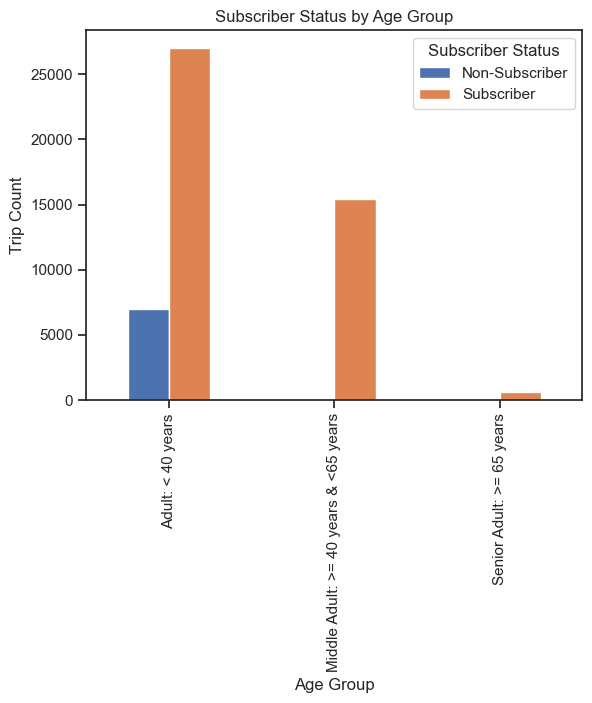

In [200]:
#creating a subscriber status by age_group
subscriber_status_by_age_group = subscriber_status_age_group_crosstab.plot.bar()
plt.title('Subscriber Status by Age Group')
plt.xlabel('Age Group')
plt.xticks(np.arange(3), ['Adult: < 40 years', 'Middle Adult: >= 40 years & <65 years', 'Senior Adult: >= 65 years'])
plt.ylabel('Trip Count')
plt.legend(title='Subscriber Status')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'subscriber_status_by_age_group.png'), bbox_inches = 'tight') #saving chart

There are only non-subscribers in the adult category.  All middle adults and senior adults are subscribers.

In [202]:
#creating a subscriber_status by day_of_week crosstab
subscriber_status_by_day_of_week_crosstab =  pd.crosstab(df['day_of_week'], df['subscriber_status'], dropna = False)

In [203]:
subscriber_status_by_day_of_week_crosstab

subscriber_status,Non-Subscriber,Subscriber
day_of_week,,
Fri,713,6596
Mon,915,6800
Sat,1541,4966
Sun,1809,5510
Thu,635,6222
Tue,632,6433
Wed,734,6494


In [330]:
#putting days of week in order in subscriber_status_by_day_of_week
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] #defining the correct order for the days of the week
subscriber_status_by_day_of_week_crosstab = subscriber_status_by_day_of_week_crosstab.reset_index() #resetting the index of the crosstab to make 'day_of_week' a column
subscriber_status_by_day_of_week_crosstab['day_of_week'] = pd.Categorical(subscriber_status_by_day_of_week_crosstab['day_of_week'], categories=day_order, ordered=True) #setting 'day_of_week' as a categorical type with the correct order
subscriber_status_by_day_of_week_crosstab_sorted = subscriber_status_by_day_of_week_crosstab.sort_values('day_of_week') #sorting the DataFrame by 'day_of_week'
subscriber_status_by_day_of_week_crosstab_sorted = subscriber_status_by_day_of_week_crosstab_sorted.set_index('day_of_week') #setting the 'day_of_week' back as the index
print(subscriber_status_by_day_of_week_crosstab_sorted) #printing the sorted crosstab

subscriber_status  Non-Subscriber  Subscriber
day_of_week                                  
Mon                           915        6800
Tue                           632        6433
Wed                           734        6494
Thu                           635        6222
Fri                           713        6596
Sat                          1541        4966
Sun                          1809        5510


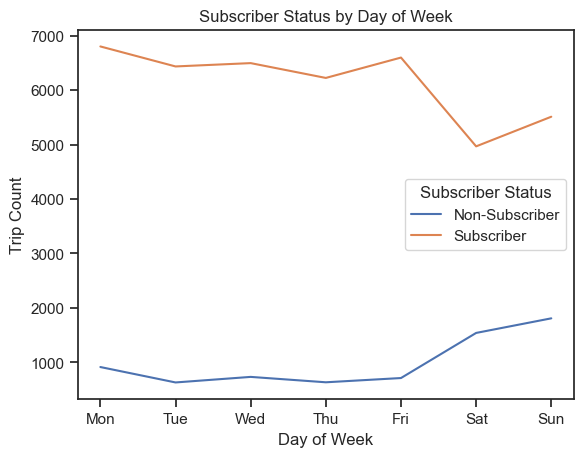

In [332]:
#creating a subscriber_status by day_of_week chart
subscriber_status_by_day_of_week = subscriber_status_by_day_of_week_crosstab_sorted.plot.line()
plt.title('Subscriber Status by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.legend(title='Subscriber Status')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'subscriber_status_by_day_of_week.png'), bbox_inches = 'tight') #saving chart

There are significantly more subscribers than non-subscribes regardless of day of week.  Non-subscibers ride more on weekends.  Subscribers ride less on weekends.  

## 05. Answering Questions from Exercise 6.1

### What are the busiest days and hours for Citibikers? 

The busiest days are Mondays.  The busiest hours are 7 am to 8 pm. 

### How does rider behavior differ based on gender?  

Over 3 times more males ride than females.

### How does rider behavior differ based on subscriber status?

Over 6 times more subscribers ride than non-subscribers.

### Does trip duration vary among days?  

Yes.  The most short rides (<15 mins) are taken on Mondays and the least on Saturdays.
The number of middle rides (>=15 mins & <30 mins) stays fairly constant from Monday to Saturday, then increases on Sunday.
The number of long rides (>= 30 mins) stays fairly constant from Monday to Friday, then increases on Saturdays and Sundays. 

### Does trip duration vary among genders? 

Males take significantly more short and middle-length rides than females. The number of long rides taken is more evenly distributed among the genders. 

### Does trip duration vary among age groups?

Adults (<40 years) ride the most regardless of length category.  Senior adults (>=65 years) mostly only take short rides. 

### Does trip duration vary among subscriber statuses?

Signficantly more subscribers take middle and short rides than non-subscribers.  Long rides are more evenly distributed among subscriber status. 

### Does subscriber status vary among genders?

All males and females are subscribers.  Unknowns are almost all non-subscribers.

### Does subscriber status vary among age groups? 

There are only non-subscribers in the adult category.  All middle adults and senior adults are subscribers.

## 06. Additional Questions & Hypotheses

Do busiest days and hours vary among genders?

### Hypotheses

No hypotheses can be defined at this point. 